In [3]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

from PIL import Image

# Parte 1

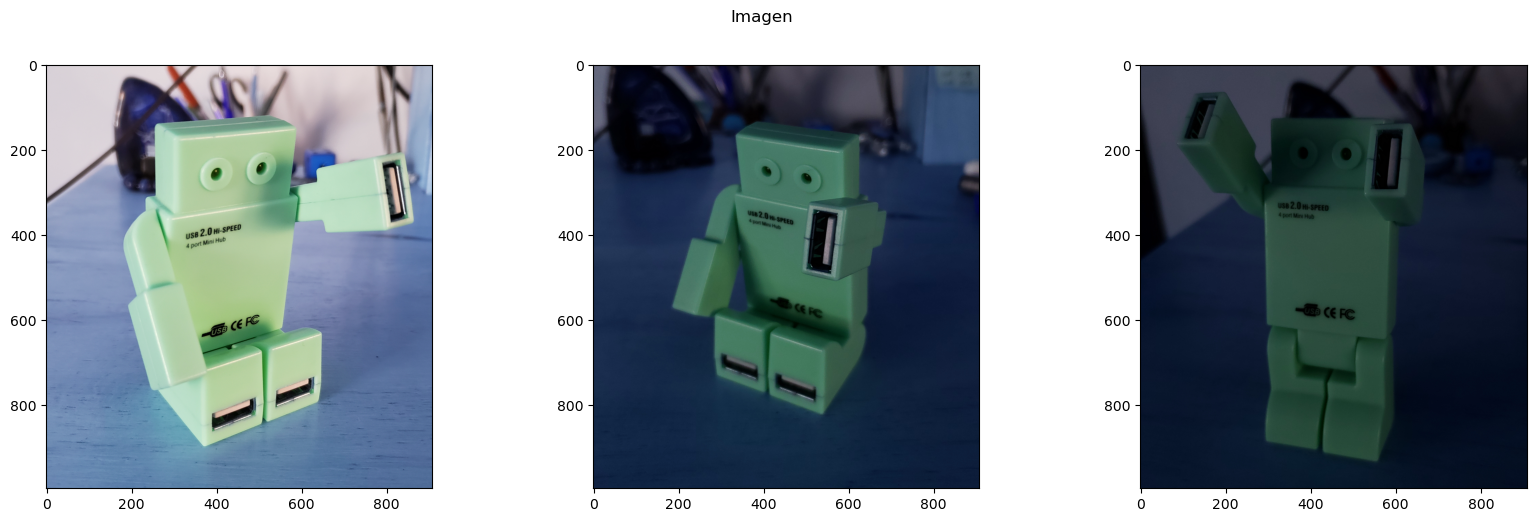

In [5]:
# Cargo las imágenes de ejemplo
img1 = cv.imread('coord_cromaticas\CoordCrom_1.png')
img2 = cv.imread('coord_cromaticas\CoordCrom_2.png')
img3 = cv.imread('coord_cromaticas\CoordCrom_3.png')
img4 = cv.imread('white_patch\wp_red2.jpg')
img5 = cv.imread('white_patch\wp_green2.jpg')
img6 = cv.imread('white_patch\wp_blue.jpg')

plt.rcParams["figure.figsize"] = [20.00, 5.50]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f'Imagen')

ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)

plt.show()

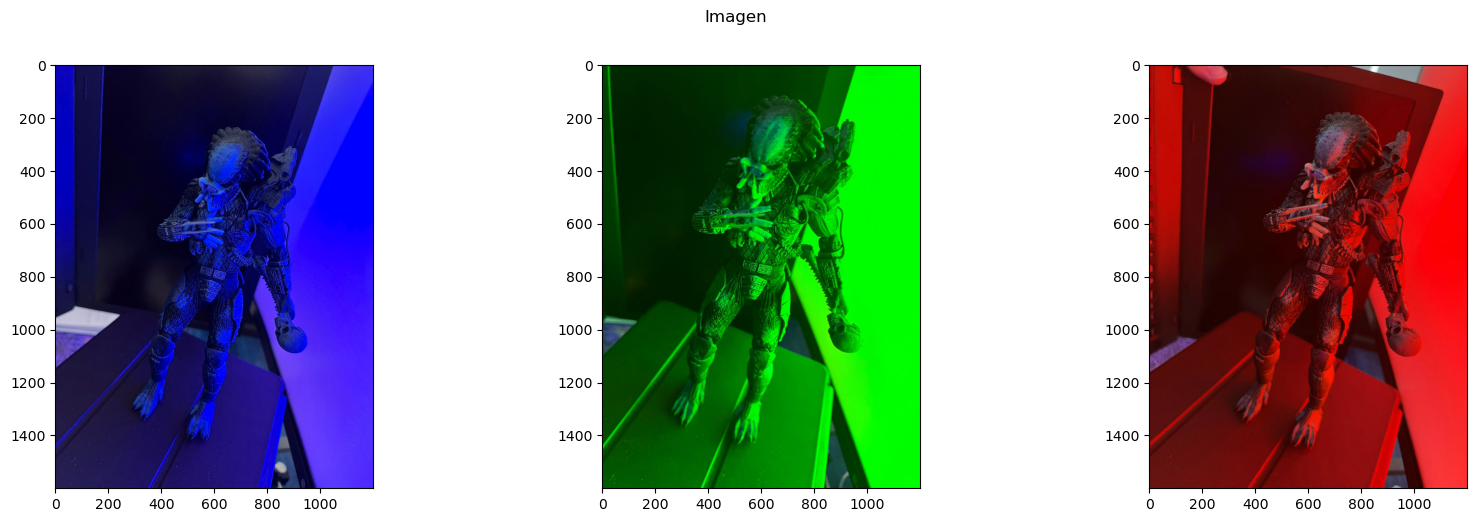

In [6]:
plt.rcParams["figure.figsize"] = [20.00, 5.50]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f'Imagen')
ax1.imshow(img4)
ax2.imshow(img5)
ax3.imshow(img6)

plt.show()

## Defino los algoritmos de white patch y coordenadas cromaticas

In [ ]:
def transf1(img,x):
    plt.rcParams["figure.figsize"] = [9.00, 5.50]
    imgMOD = ((img).sum(axis=2)+1)          #Sumo 1 para evitar dividir por 0
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Imagen {x}')
    ax1.imshow(cv.merge([img[:,:,2],img[:,:,1],img[:,:,0]]))
    ax2.imshow(cv.merge([img[:,:,2]/imgMOD,img[:,:,1]/imgMOD,img[:,:,0]/imgMOD]))
    plt.show()


In [ ]:
def transf2(img, s):
    imgORIG = img
    plt.rcParams["figure.figsize"] = [9.00, 5.50]
    (B,G,R) = cv.split(img)
    B1,G1,R1 = (B.max(), G.max(), R.max())
    imgMOD = cv.merge([B*s/B1, G*s/G1, R*s/R1])
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Valores máximos de B, G, R : {B1,G1,R1}')
    ax1.imshow(imgORIG)
    ax2.imshow(imgMOD)
    plt.show()


## Hago las pruebas de los algoritmos

In [ ]:
transf1(img1, 1),transf1(img2, 2),transf1(img3, 3)


In [ ]:
transf2(img4, 1), transf2(img5, 1), transf2(img6, 1)

## Extra: Mejoro el algoritmo de whitepatch para que no tome el valor máximo como blanco sino que tome un percentil que yo determine para reflejar mas el cambio

#### En el caso de la imagen RED puede verse que no se aplicaron cambios por tener un punto en la imagen con 255 como máximo

In [ ]:
def transf3(img, s, percentile):
    imgORIG = img
    plt.rcParams["figure.figsize"] = [9.00, 5.50]
    (B,G,R) = cv.split(img)
    B1,G1,R1 = (np.percentile(B, percentile), np.percentile(G, percentile), np.percentile(R, percentile))
    imgMOD = cv.merge([B*s/B1, G*s/G1, R*s/R1])
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Valores máximos de B, G, R : {B1,G1,R1}')
    ax1.imshow(imgORIG)
    ax2.imshow(imgMOD)
    plt.show()


In [ ]:
transf3(img4, 1, 98), transf3(img5, 1, 99), transf3(img6, 1, 98)

# Parte 2

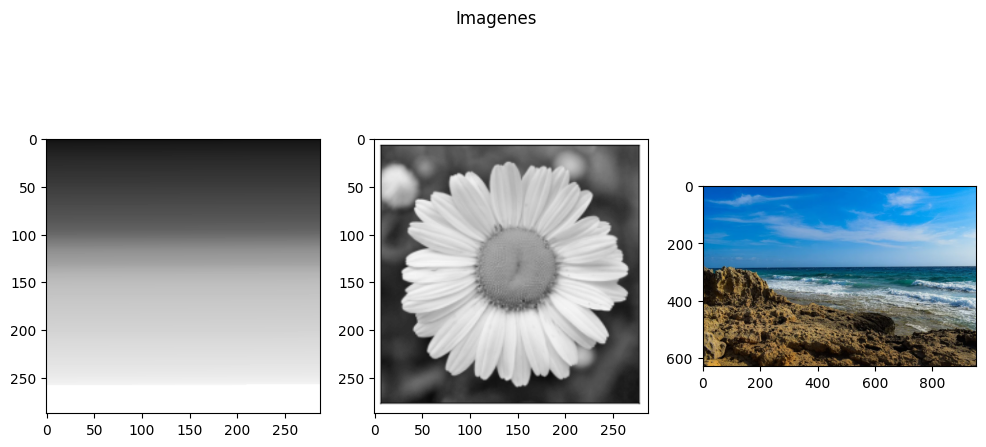

In [2]:
# Cargo las imágenes
img21 = cv.imread('img1_tp.png',0)
img22 = cv.imread('img2_tp.png',0)
img23 = cv.cvtColor(cv.imread('segmentacion.png'), cv.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"] = [12.00, 5.50]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f'Imagenes')

ax1.imshow(img21, cmap= 'gray')
ax2.imshow(img22, cmap= 'gray')
ax3.imshow(img23)

plt.show()

In [3]:
def histogram(img, min, max):
    bins = max - min
    plt.rcParams["figure.figsize"] = [17.00, 5.50]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Imagen original vs ecualizada')

    ax1.imshow(img, cmap= 'gray')
    ax2.hist(img.ravel(), bins, [min,max])

    plt.show()


In [4]:
def thresh (img, umbral, max, objetivo, metodo):
    ret,thresh1 = cv.threshold(img,umbral,max,metodo)
    images = [img, thresh1]
    titles = ['Imagen original en escala de Gris',f'Mascara de la {objetivo}']
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(images[i], cmap='gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    return thresh1

In [5]:
def thresh2 (img, umbral, max, objetivo, metodo, hwindow):
    ret,thresh1 = cv.threshold(img,umbral,max,metodo)
    images = [img, thresh1]
    thresh1[hwindow:-1,:] = 0
    titles = ['Imagen original en escala de Gris',f'Mascara de la {objetivo}']
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(images[i], cmap='gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    return thresh1

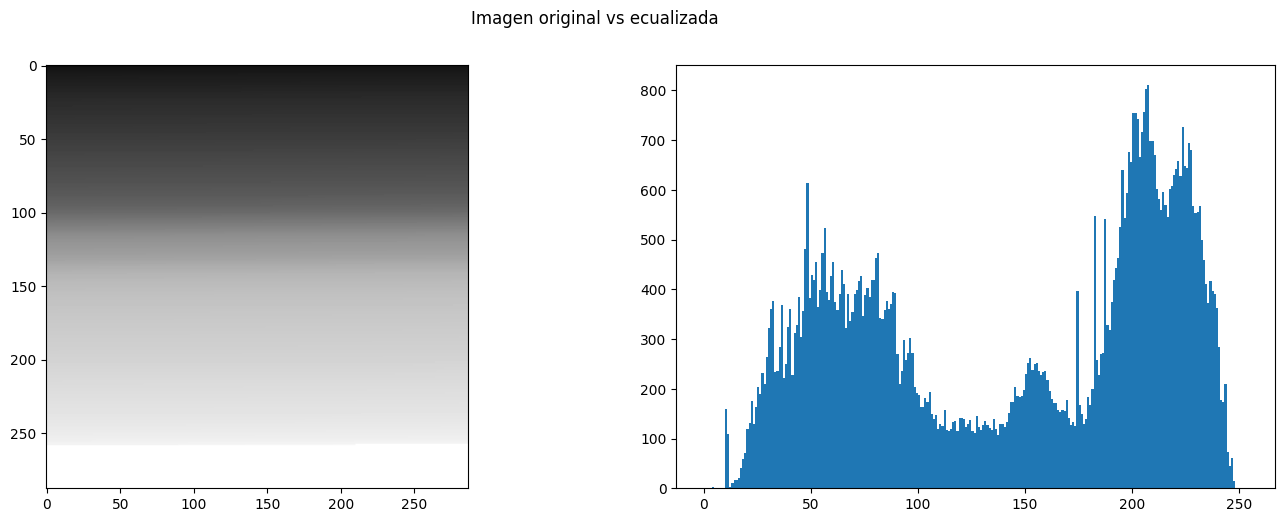

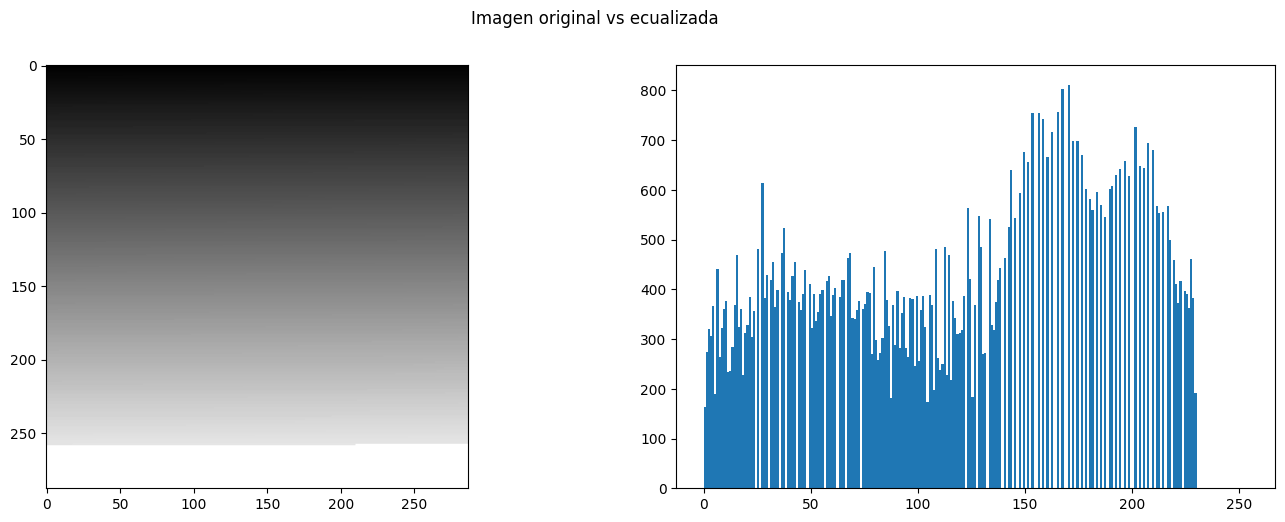

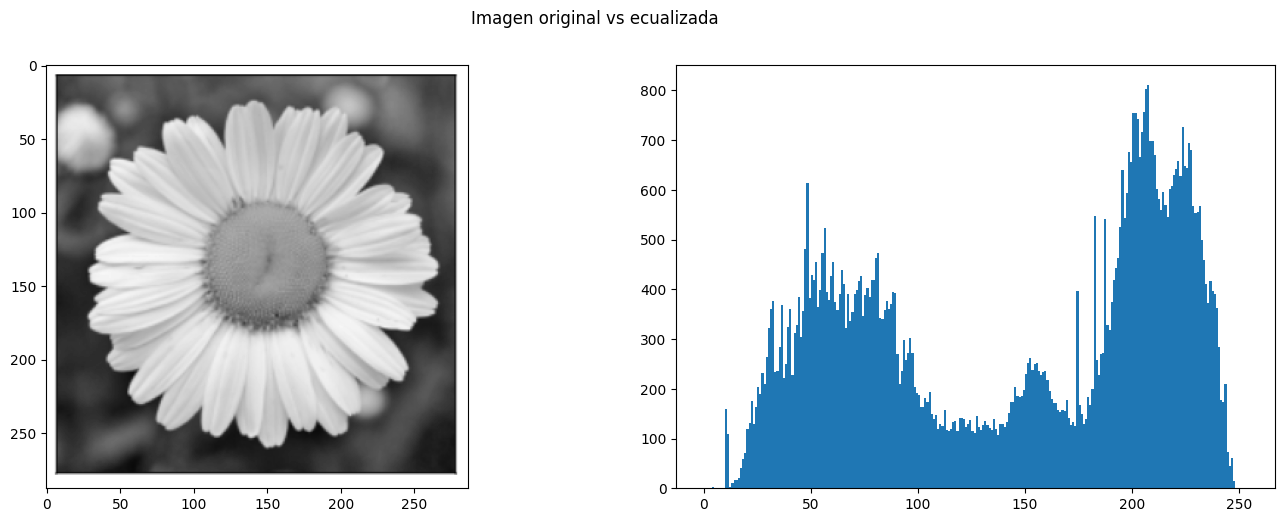

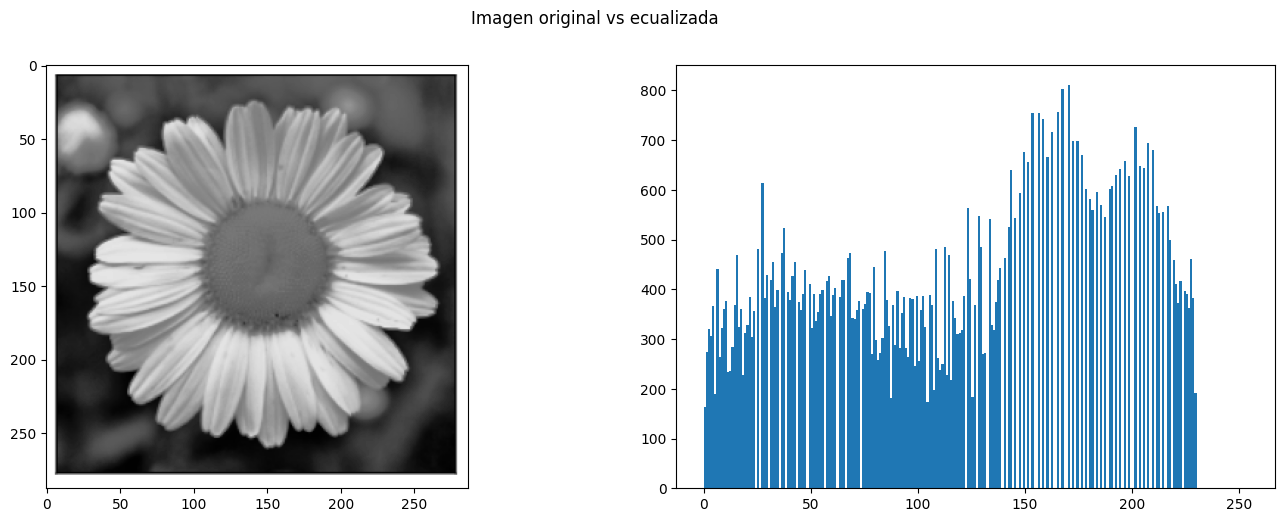

In [5]:
histogram(img21,0,254)
histogram(cv.equalizeHist(img21),0,254)
histogram(img22,0,254)
histogram(cv.equalizeHist(img22),0,254)

La utilizacion de histogramas permite agrupar objetos con caracteristicas de color similares, por ejemplo en la imagen de la flor podrian reconocerse 3 sectores en el histograma (Fondo, Petalos blancos y Centro gris) que se encuentran separados por 2 valles. Esto me daria una orientación para mi algoritmo en caso de querer segmentar la imagen.

In [6]:
img23gray = cv.cvtColor(img23, cv.COLOR_BGR2GRAY)
img23hsv = cv.cvtColor(img23, cv.COLOR_BGR2HSV)
img23lab = cv.cvtColor(img23, cv.COLOR_BGR2LAB)

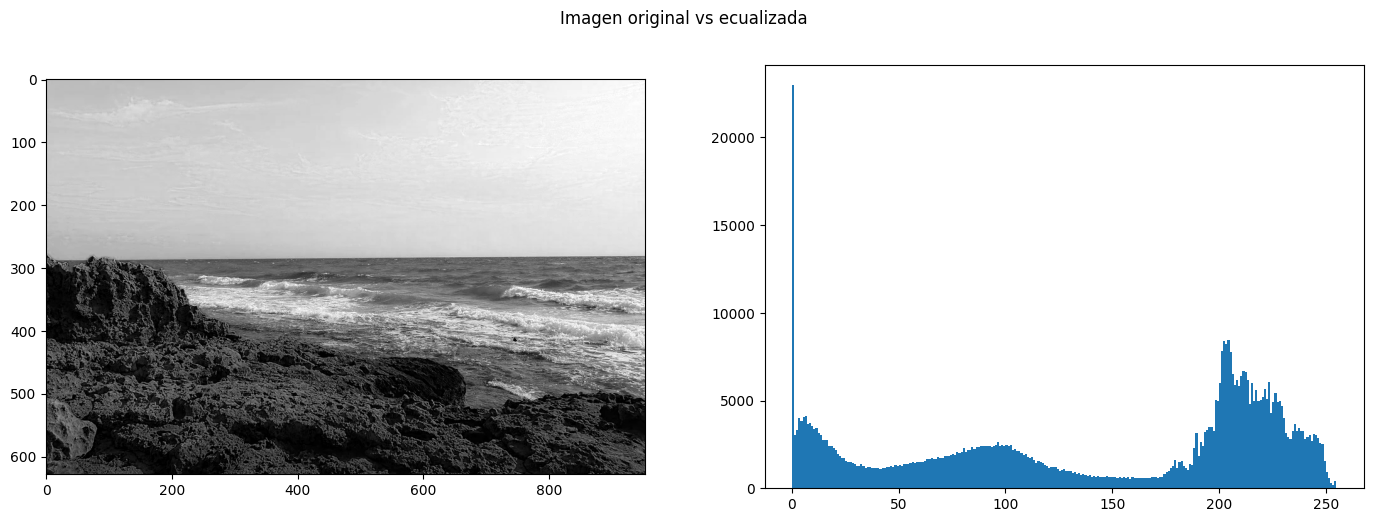

In [7]:
histogram(img23[:,:,2],0,255)#,histogram(img23gray,0,255)

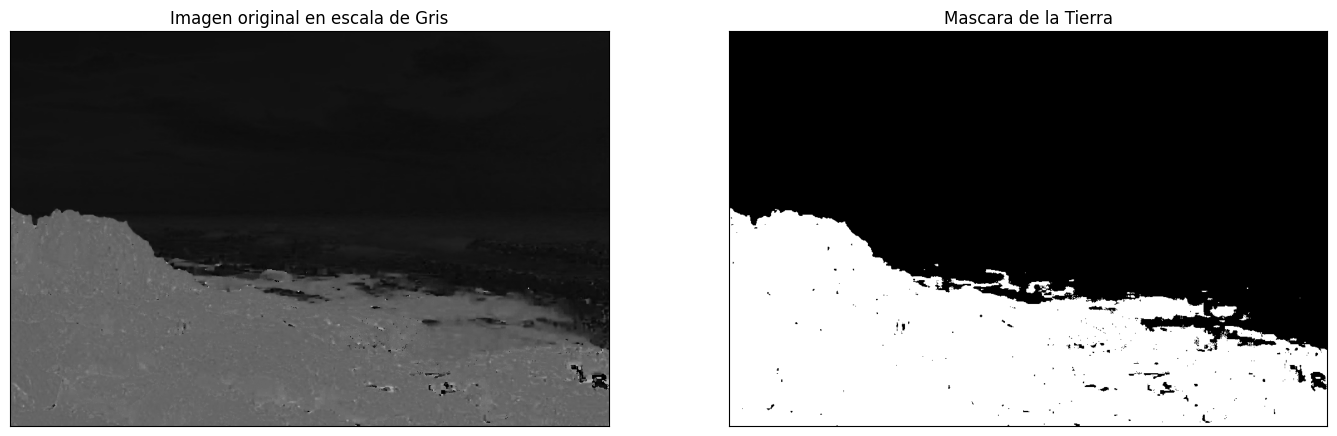

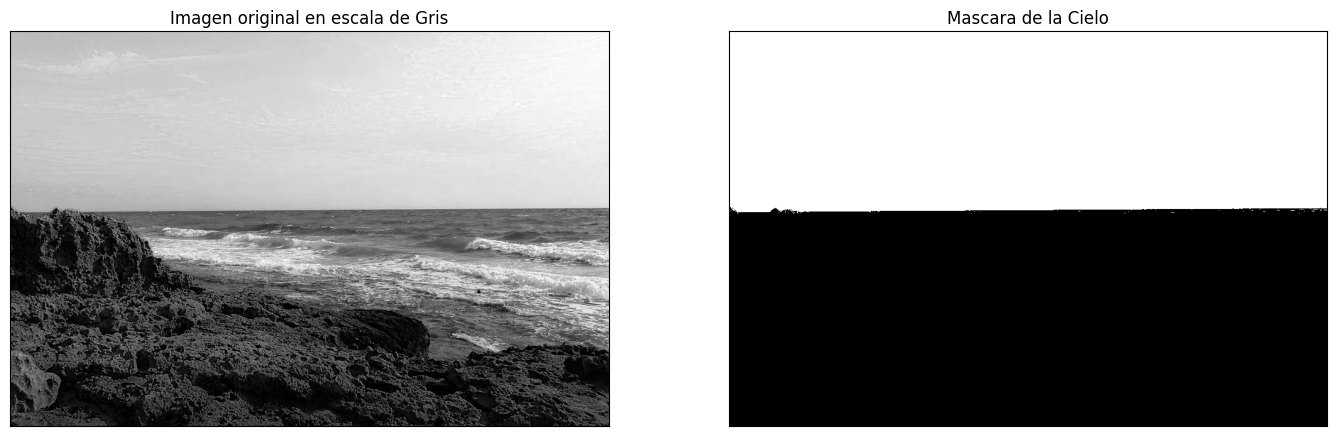

In [9]:
tierra = thresh( img= img23hsv[:,:,0],
        umbral= 90,
        max= 255,
        objetivo= 'Tierra',
        metodo= cv.THRESH_BINARY),

cielo = thresh2( img= img23[:,:,2],
        umbral= 1,
        max= 255,
        objetivo= 'Cielo',
        metodo= cv.THRESH_OTSU,
        hwindow=290),


En el histograma puede detectarse un pico el cual en gran parte corresponde al cielo por el brillo, podria mejorarse al filtrar por canales de color para separar tierra de agua y cielo, y aprovechar la horizontalidad del oceano para marcar un corte. Por ultimo, tomo el mar de la diferencia entre las otras 2 capas.

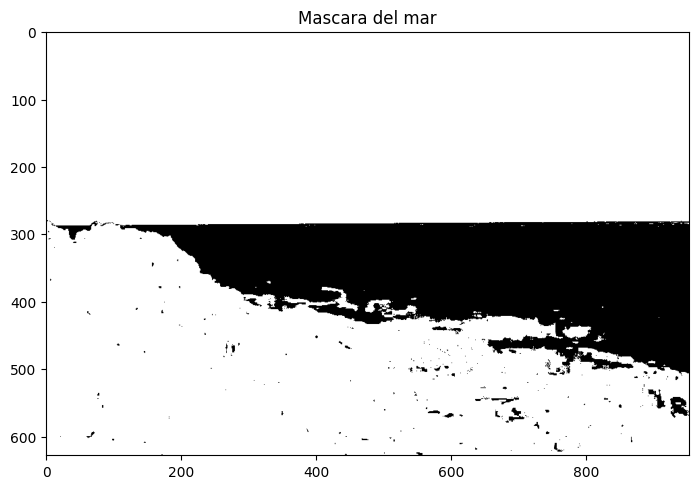

In [10]:
img_suma = cv.add(cielo[0], tierra[0])
plt.title(f'Mascara del mar')
plt.imshow(img_suma, cmap='gray')
